# Практическая работа по Эконометрике

### Рудаков Евгений,  ЗЕБЗ-01-16
### Вариант № 27

### Задача: построить линейное уравнение парной регрессии на заданных данных и исследовать его. Решение задачи реализовано на языке Python с использованием математических и графических библиотек. В работе присутствует код и его вывод. Для восприятия работы нет необходимости читать код, достаточно посмотреть на то, что он выводит.

In [1]:
# Импортирование необходимых библиотек

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Внесем исходные данные

In [2]:
# Создание таблицы с исходными данными

frame = pd.DataFrame(data = {"Среднедушевой прожиточный минимум в день, x": [69, 83, 92, 97, 88, 93, 74, 79, 105, 99, 85, 94],
                      "Среднедневная зарплата, y" : [124, 133, 146, 153, 138, 159, 145, 152, 168, 154, 127, 155]},
                     columns = ["Среднедушевой прожиточный минимум в день, x",
                                "Среднедневная зарплата, y"],
                     index = range(1,13))
frame.index.name = "№ региона"
frame

,"Среднедушевой прожиточный минимум в день, x","Среднедневная зарплата, y"
№ региона,,
1,69,124
2,83,133
3,92,146
4,97,153
5,88,138
6,93,159
7,74,145
8,79,152
9,105,168


## 1
### Можно произвести расчет коэффициентов линейной регрессии по формулам: $$ B_{1} = \frac{\sum_{i=1}^n x_{i}\cdot (\overline{y} - y_{i})}{\sum_{i=1}^n x_{i}\cdot (\overline{x} - x_{i})}\quad\quad\quad B_{0} = \overline{y} - B_{1}\cdot \overline{x} $$ Но мы опробуем матричный подход, представив столбцы таблицы X и Y в виде векторов-столбцов. Вектор-столбец из X превратим в матрицу 12 на 2, дополнительно прописав в первом столбце единицы. Уравнение регрессии в матричном виде: $$ Y = B\cdot X + E $$ Теперь задача звучит так: найти матрицу коэффициентов B, размера 2 на 1, чтобы $$ E^T\cdot E\rightarrow min $$ Для вычисления матрицы коэффициентов используем формулу: $$ B = (X^{T}\cdot X)^{-1}\cdot X^{T}\cdot Y $$ Таким образом, имеем матрицы:

In [3]:
# Отображение матриц

x = np.concatenate((np.array([1]*frame.shape[0]).reshape(frame.shape[0], 1),
                    np.array(frame["Среднедушевой прожиточный минимум в день, x"]).reshape(frame.shape[0], 1)), axis = 1)
y = np.array(frame["Среднедневная зарплата, y"]).reshape(frame.shape[0],1)
x_and_y = pd.DataFrame(x)
x_and_y[2] = [" "*13]*frame.shape[0]
x_and_y[3] = y
x_and_y[4] = [" "*10]*frame.shape[0]
x_and_y[5] = ["B0", "B1"] + [""]*10
x_and_y[6] = [" "*9]*frame.shape[0]
x_and_y[7] = ["E"+str(i) for i in range(frame.shape[0])]
print("  X\t\t\tY\t\tB\t\tE", x_and_y.to_string(index = False, header = False), sep = "\n")

  X			Y		B		E
1   69                 124              B0              E0
1   83                 133              B1              E1
1   92                 146                              E2
1   97                 153                              E3
1   88                 138                              E4
1   93                 159                              E5
1   74                 145                              E6
1   79                 152                              E7
1  105                 168                              E8
1   99                 154                              E9
1   85                 127                             E10
1   94                 155                             E11


### Произведем расчет и выведем полученные коэффициенты.

In [4]:
# Расчет и получение регрессионной функции

B = np.linalg.inv(x.T@x)@x.T@y
print("B0 =", B[0][0], "\nB1 =", B[1][0])
f = lambda x: B[0][0] + x*B[1][0] 

B0 = 64.8276418392 
B1 = 0.922559827911


### Полученая модель: $$ y =  64.83 + 0.92\cdot x + e $$ говорит о том, что с увеличением прожиточного минимума на 1000 руб. средняя зарплата увеличивается на 923 руб. 

### Заполним таблицу статистическими данными

In [5]:
# Дополнение таблицы

x_mean = np.mean(frame["Среднедушевой прожиточный минимум в день, x"])
y_mean = np.mean(frame["Среднедневная зарплата, y"])
frame["x\u00B2"] = frame["Среднедушевой прожиточный минимум в день, x"]**2
frame["x - x̄"] = frame["Среднедушевой прожиточный минимум в день, x"] - [x_mean]*frame.shape[0]
frame["y - \u0233"] = frame["Среднедневная зарплата, y"] - [y_mean]*frame.shape[0]
#frame["(x - x̄)*(y - \u0233)"] = frame["x - x̄"] * frame["y - \u0233"]
frame["(x - x̄)\u00B2"] = frame["x - x̄"]**2
frame["(y - \u0233)\u00B2"] = frame["y - \u0233"]**2
frame["\u0177ₓ"] = [f(x) for x in frame["Среднедушевой прожиточный минимум в день, x"]]
frame["y - \u0177ₓ"] = frame["Среднедневная зарплата, y"] - frame["\u0177ₓ"]
frame["(y - \u0177ₓ)\u00B2"] = frame["y - \u0177ₓ"]**2
frame["A, %"] = np.abs(frame["y - \u0177ₓ"]/frame["Среднедневная зарплата, y"]*100)
frame.index.name = None
# frame.append([["nothing"]*frame.shape[1]], ignore_index = True)
frame.rename(columns = {"Среднедушевой прожиточный минимум в день, x": "x",
                      "Среднедневная зарплата, y" : "y"}, inplace = True)
frame.loc["Итого"] = [round(sum(frame[column]), 2) for column in frame.columns]
frame.loc["Среднее"] = frame.loc["Итого"]/(frame.shape[0] - 1)
frame.round(2)




,x,y,x²,x - x̄,y - ȳ,(x - x̄)²,(y - ȳ)²,ŷₓ,y - ŷₓ,(y - ŷₓ)²,"A, %"
1,69.00,124.00,4761.00,-19.17,-22.17,367.36,491.36,128.48,-4.48,20.11,3.62
2,83.00,133.00,6889.00,-5.17,-13.17,26.69,173.36,141.40,-8.40,70.56,6.32
3,92.00,146.00,8464.00,3.83,-0.17,14.69,0.03,149.70,-3.70,13.71,2.54
4,97.00,153.00,9409.00,8.83,6.83,78.03,46.69,154.32,-1.32,1.73,0.86
5,88.00,138.00,7744.00,-0.17,-8.17,0.03,66.69,146.01,-8.01,64.21,5.81
6,93.00,159.00,8649.00,4.83,12.83,23.36,164.69,150.63,8.37,70.13,5.27
7,74.00,145.00,5476.00,-14.17,-1.17,200.69,1.36,133.10,11.90,141.68,8.21
8,79.00,152.00,6241.00,-9.17,5.83,84.03,34.03,137.71,14.29,204.21,9.40
9,105.00,168.00,11025.00,16.83,21.83,283.36,476.69,161.70,6.30,39.74,3.75
10,99.00,154.00,9801.00,10.83,7.83,117.36,61.36,156.16,-2.16,4.67,1.40


## 2.
### Построим графики реальных данных и функции линейной регрессии

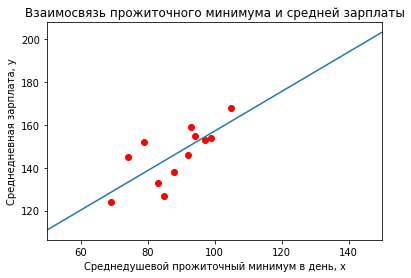

In [6]:
# Построение графика

fig, ax = plt.subplots()
ax.plot(frame["x"][:12], frame["y"][:12], "ro")
ax.plot([50, 150], [f(x) for x in [50, 150]])
ax.set_title("Взаимосвязь прожиточного минимума и средней зарплаты")
ax.set_xlim(50, 150)
ax.set_xlabel("Среднедушевой прожиточный минимум в день, x")
ax.set_ylabel("Среднедневная зарплата, y")

## 3.
### Рассчитаем линейный коэффициент парной корреляции и среднюю ошибку аппроксимации.

In [7]:
# Расчет линейного коэффициента корреляции

r = B[1][0]*np.sqrt(frame.iloc[-1][0]/frame.iloc[-1][1])
print("r =", r, "\nr^2 =", r**2, "\nA =", frame.iloc[-1][-1], "%")

r = 0.716510532907 
r^2 = 0.513387343767 
A = 5.1825 %


### Высокий коэффициент корреляции: $$ r_{xy} = 0.717 $$ говорит о присутствии высокой линейной взаимосвязи между признаками, которую мы обязательно должны учитывать.
### Коэффициент детерминации: $$ r_{xy}^2 = 0.513 $$ показывает, что уравнением регрессии объяснятся 51.3 % дисперсии результативного признака.
### Довольно низкая средняя ошибка аппроксимации:  $$ A = 5.18 \% $$ говорит о том, что подобранная модель адекватно отображает взаимосвязь между признаками.

## 4.
### Табличное значение F-критерия Фишера для $$ k_{1} = m = 1, k_{2} = n - m - 1 = 10, \alpha = 0.05: F_{табл} = 4.96 $$ Получим расчетное значение F-критерия Фишера по формуле $$ F = \frac{r_{xy}^2}{1 - r_{xy}^2}\cdot (n-2)$$

In [8]:
# Расчет F-критерия Фишера

F = r**2 / (1 - r**2)*(len(x) - 2)
print ("F =", F )

F = 10.5502258766


### Полученное расчетное значение F-критерия Фишера: $$ F = 10.55 $$выше табличного, что говорит о статистической значимости уравнения регрессии в целом.

### Табличное значение t-критерия Стьюдента для $$ v = n - m - 1 = 10, \alpha = 0.025: t_{табл} = 2,228 $$ Найдем расчетное значение t-критериев Стьюдента для B0, B1, r. Для начала найдем необъясненную дисперсию по формуле $$ S_{ост}^2 = \frac{\sum (y - \hat{y})^2}{n - m - 1} $$ Затем случайные ошибки параметров $$ m_{B_{0}} = \frac{S_{ост}\cdot \sqrt{\sum x^2}}{\sigma_{x}\cdot {n}},\quad\quad m_{B_{1}} = \frac{S_{ост}}{\sigma_{x}\cdot\sqrt{ n}}, \quad\quad m_{r_{xy}} = \frac{\sqrt{1 - r_{xy}^2}}{n - m - 1} $$ И далее получим расчетные значения t-критерия Стьюдента: $$ t_{B_{0}} = B_{0}/ m_{B_{0}},\quad\quad t_{B_{1}} = B_{1}/ m_{B_{1}},\quad\quad t_{r_{xy}} = r_{xy}/ m_{r_{xy}}$$ 

In [9]:
# Расчет t-критерия Стьюдента

S_2 = frame.iloc[-2][-2]/(len(x) - 1 - 1)
m_B0 = np.sqrt( S_2 * frame.iloc[-2][2]/ frame.iloc[-1][5])/len(x)
m_B1 = np.sqrt( S_2 / (frame.iloc[-1][5] * len(x) ))
m_r = np.sqrt((1 - r**2)/(len(x) - 1 - 1))
t_B0 = B[0][0]/m_B0
t_B1 = B[1][0]/m_B1
t_r = r/m_r

print("S_2 =", S_2)
print("m_B0 =", m_B0)
print("m_B1 =", m_B1)
print("m_r =", m_r)
print("t_B0 =", t_B0)
print("t_B1 =", t_B1)
print("t_r =", t_r)

S_2 = 90.657
m_B0 = 24.0004209753
m_B1 = 0.270425490427
m_r = 0.220592986342
t_B0 = 2.70110436421
t_B1 = 3.41151208214
t_r = 3.24811112442


### Расчетный t-критерий Стьюдента для параметров и для r: $$ t_{B_{0}} = 2.7,\quad\quad t_{B_{1}} = 3.41,\quad\quad t_{r_{xy}} = 3.25 $$ больше, чем табличное значение критерия. Следовательно, параметры регрессии и показатель частоты связи значимы.  

In [10]:
# Расчет доверительных интервалов

interval_B0 = np.array([B[0][0]]*2) + np.array([-2.228*m_B0, 2.228*m_B0])
interval_B1 = np.array([B[1][0]]*2) + np.array([-2.228*m_B1, 2.228*m_B1])
print("Доверительный интервал для B0: ", list(interval_B0))
print("Доверительный интервал для B1: ", list(interval_B1))

Доверительный интервал для B0:  [11.35470390628381, 118.30057977212311]
Доверительный интервал для B1:  [0.32005183523933389, 1.5250678205821155]


###  Доверительные интервалы коэффициентов: $$ B_0 \in [11.35, 118.3] $$
### $$ B_1 \in [0.32, 1.53] $$